In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from run import MACHS, grids, solvers, mk_prefix

In [2]:
execfile('../../matplotlibrc.py')

In [73]:
def line_to_arr(line):
    return np.array(line.strip().split(),dtype=float) 
def read_grid(grid):
    with open(grid) as f:
        f.readline()
        x = line_to_arr(f.readline())
        y = line_to_arr(f.readline())    
    return x, y
def read_dat(prefix, var):
    filename = 'dat/%s_%s.dat' % (prefix, var)
    return np.genfromtxt(filename, unpack=True)
def mk_airfoil_mask(x):
    return np.logical_and(x >= 20, x <= 21)

# Question 2

Provide a plot of the pressure coefficient along the airfoil surface with the negative
pointing upwards. Vary the freestream Mach number between [0.80, 0.90] with 0.02
increments. For each case, provide a convergence plot of the L∞-norm, surface pressure
coefficient as a function of x, and pressure contour for x ∈ [20, 21] and y ∈ [0, 1]. Discuss
your findings. A four order reduction in the residual is sufficient for the Gauss-Seidel
method

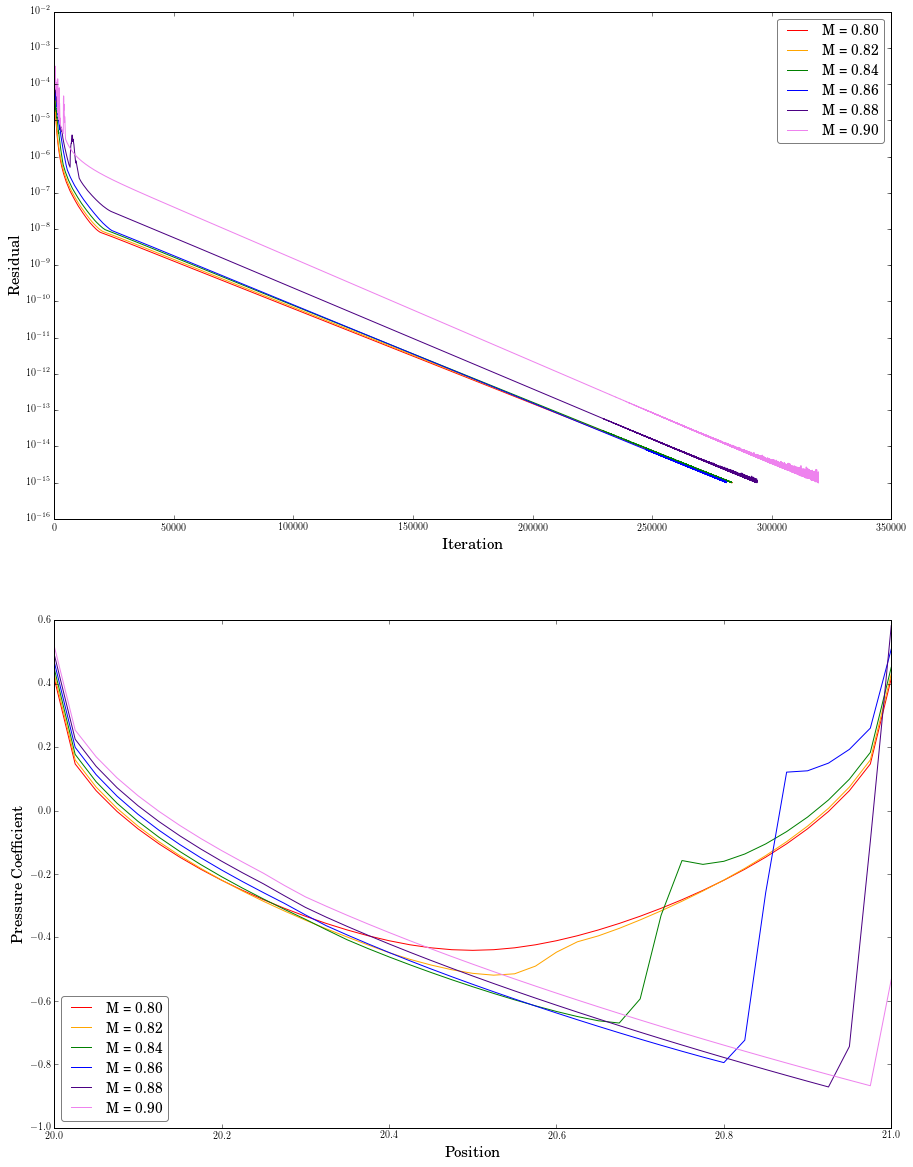

In [76]:
# Convergence Plots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 20))
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Residual')
ax2.set_xlabel('Position')
ax2.set_ylabel('Pressure Coefficient')
grid = grids[0]
solver = solvers[0]
x, y = read_grid(grid)
airfoil = mk_airfoil_mask(x)
colors = ['r', 'orange', 'green', 'blue', 'indigo', 'violet']
for mach, color in zip(MACHS, colors):
    prefix = mk_prefix(grid=grid, solver=solver, mach=mach)
    label = 'M = %.2f' % mach
    r = read_dat(prefix, 'r')
    Cp = read_dat(prefix, 'Cp')
    ax2.plot(x[airfoil], Cp[0, airfoil], label=label, color=color)
    ax1.semilogy(r, label=label, color=color)
ax1.legend()
ax2.legend()
plt.show()

In [ ]:
# Convergence Plots
fig, ax = plt.subplots(figsize=(15, 12))
ax.set_xlabel('Position')
ax.set_ylabel('Pressure Coefficient')
grid = grids[0]
solver = solvers[0]
x, y = read_grid(grid)
colors = ['r', 'orange', 'green', 'cyan', 'blue', 'violet']
for mach, color in zip(MACHS, colors):
    prefix = mk_prefix(grid=grid, solver=solver, mach=mach)
    label = 'M = %.2f' % mach
    r = read_dat(prefix, 'r')
    ax.semilogy(r, label=label, color=color)
ax.legend()
plt.show()

In [62]:
# M1 = np.genfromtxt('dat/coarse_Regular_0.90_M.dat', unpack=True)
# M2 = np.genfromtxt('dat/coarse_Regular_0.88_M.dat', unpack=True)
# phi = np.genfromtxt('phi.dat', unpack=True)
# P = np.genfromtxt('P.dat', unpack=True)
Cp = np.genfromtxt('dat/coarse_Regular_0.82_Cp.dat', unpack=True)

(19, 22)

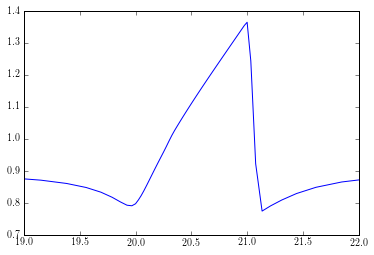

In [34]:
plt.plot(x, M[5,:])
plt.xlim(19, 22)

In [54]:
len(x)

80

In [55]:
len(Cp[0,:]) == len(x)

True

In [59]:
xlim1 = (x >= 20).argmax()
xlim2 = (x > 21).argmax()

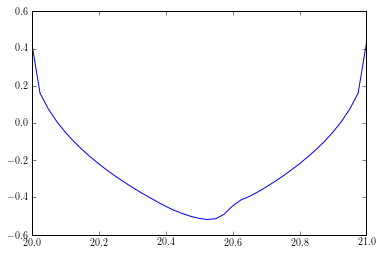

In [63]:
plt.plot(x[xlim1:xlim2], Cp[0,xlim1:xlim2])

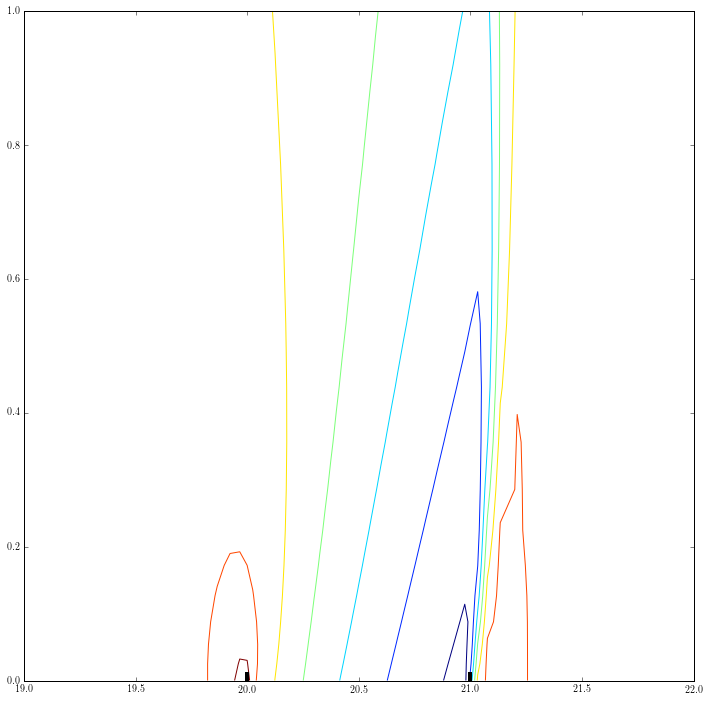

In [56]:
fig, ax = plt.subplots(figsize=(12, 12))
levels = np.linspace(0.7, 1.4, 11)
var = Cp
cs = ax.contour(x, y, var)
ax.set_xlim(19, 22)
ymax = 1
ax.set_ylim(0, ymax)
ax.plot([20, 20], [0, ymax*0.01], 'k-', lw=4)
ax.plot([21, 21], [0, ymax*0.01], 'k-', lw=4)

# fig.colorbar(cs)

(19, 22)

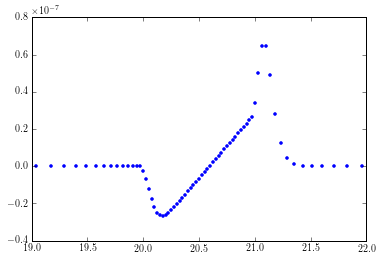

In [77]:
plt.plot(x, phi[10,:], 'b.')
plt.xlim(19, 22)

In [71]:
y[1] - y[0]

0.025000000000000001

In [ ]:
np.arange()